In this notebook, I will make a script to identify LD blocks in a population.

In [1]:
%run ../scripts/notebook_settings_lean.py
from glob import glob
import os
import zarr
import allel
from scipy.spatial.distance import squareform

meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep=" ")
meta_data_samples["simple_pop"] = [x.split(",")[0].replace(" ", "_") for x in meta_data_samples.Origin]

In [2]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chr20"
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode="r")
gt_zarr = allel.GenotypeArray(callset["calldata/GT"])
pos = allel.SortedIndex(callset["variants/POS"])

In [3]:
def plot_ld(gn, title, colorbar=True, ax=None, imshow_kwargs=None):
    m = allel.rogers_huff_r(gn) ** 2
    # check inputs
    from allel.stats.window import windowed_statistic
    from allel.util import asarray_ndim, ensure_square
    from allel.chunked import get_blen_array
    from allel.compat import memoryview_safe
    from allel.opt.stats import gn_pairwise_corrcoef_int8, gn_pairwise2_corrcoef_int8, \
    gn_locate_unlinked_int8
    import matplotlib.pyplot as plt

    m_square = ensure_square(m)

    # blank out lower triangle and flip up/down
    m_square = np.tril(m_square)[::-1, :]

    # set up axes
    if ax is None:
        # make a square figure with enough pixels to represent each variant
        x = m_square.shape[0] / plt.rcParams['figure.dpi']
        x = max(x, plt.rcParams['figure.figsize'][0])
        fig, ax = plt.subplots(figsize=(x, x))
        fig.tight_layout(pad=0)

    # setup imshow arguments
    if imshow_kwargs is None:
        imshow_kwargs = dict()
    imshow_kwargs.setdefault('interpolation', 'none')
    imshow_kwargs.setdefault('cmap', 'Greys')
    imshow_kwargs.setdefault('vmin', 0)
    imshow_kwargs.setdefault('vmax', 1)

    # plot as image
    im = ax.imshow(m_square, **imshow_kwargs)

    # tidy up
    ax.set_xticks([])
    ax.set_yticks([])
    for s in 'bottom', 'right':
        ax.spines[s].set_visible(False)
    if colorbar:
        plt.gcf().colorbar(im, shrink=.5, pad=0)
    ax.set_title(title)

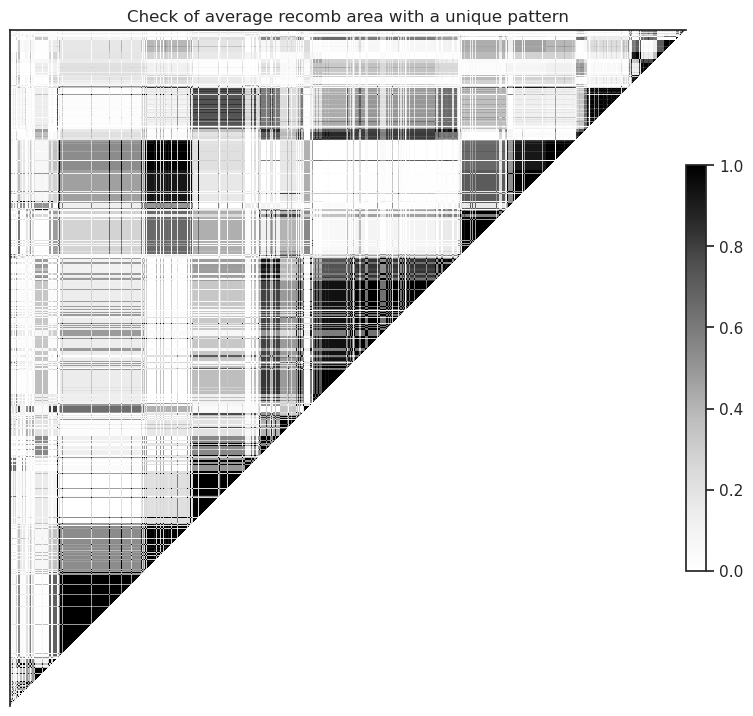

In [4]:
loc_region = pos.locate_range(13000000, 13250000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'Check of average recomb area with a unique pattern')

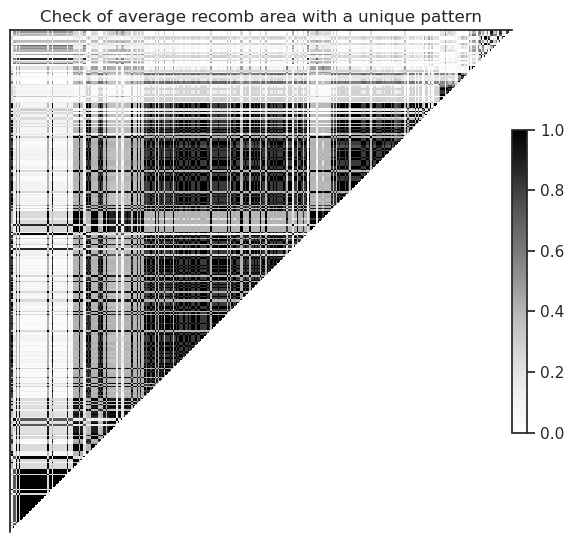

In [5]:
loc_region = pos.locate_range(11500000, 11600000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'Check of average recomb area with a unique pattern')

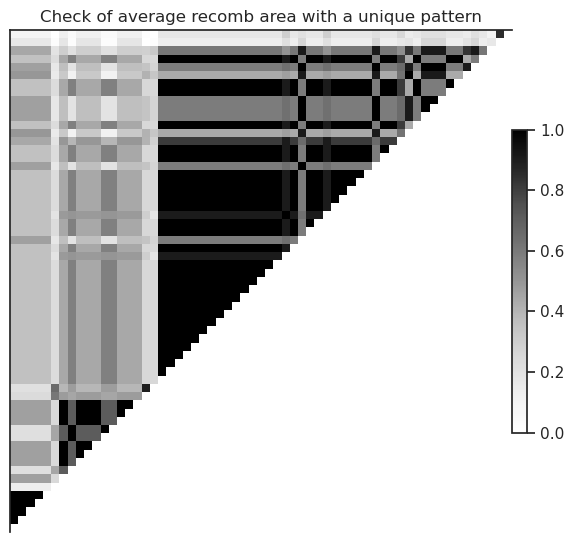

In [6]:
loc_region = pos.locate_range(10500000, 10550000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'Check of average recomb area with a unique pattern')

array([[0.        , 1.        , 0.5872256 , 0.31886798, 0.24576594,
        1.        , 0.24576594],
       [1.        , 0.        , 0.5872256 , 0.31886798, 0.24576594,
        1.        , 0.24576594],
       [0.5872256 , 0.5872256 , 0.        , 0.4033537 , 0.02059455,
        0.5872256 , 0.02059455],
       [0.31886798, 0.31886798, 0.4033537 , 0.        , 0.14943527,
        0.31886798, 0.14943527],
       [0.24576594, 0.24576594, 0.02059455, 0.14943527, 0.        ,
        0.24576594, 1.        ],
       [1.        , 1.        , 0.5872256 , 0.31886798, 0.24576594,
        0.        , 0.24576594],
       [0.24576594, 0.24576594, 0.02059455, 0.14943527, 1.        ,
        0.24576594, 0.        ]], dtype=float32)

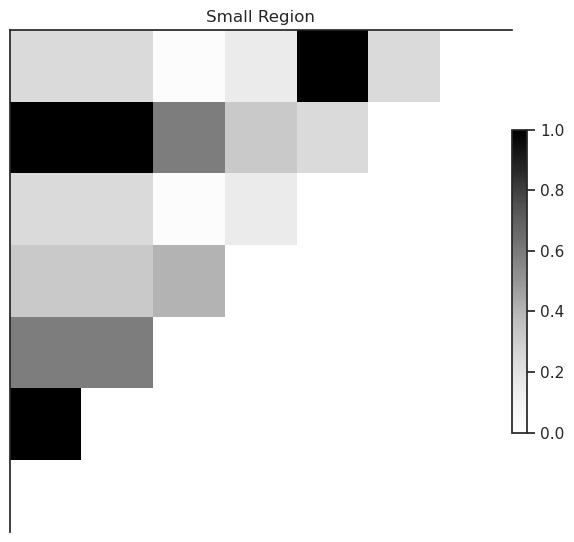

In [7]:
loc_region = pos.locate_range(13000000, 13001200)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'Small Region')

m = allel.rogers_huff_r(gn) ** 2
squareform(m)

In [8]:
loc_region = pos.locate_range(13000000, 13250000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
gn
pos_reg = pos[loc_region].compress(flt, axis=0)

Implementing the algorithms

In [9]:
def ldblock_identification(gn, pos, min_block=8, window_size=200, retry_rule=0.8, extend_rule=0.85):
    ###
    # Inputs required are the gn (allele counts) and the associated positions.
    # They need to be equal length.
    # Optional parameters are minimum block size (int), window sizes to calculate (int),
    # and two stopping rules (floats between 0 and 1)
    # The retry rule stops the block agglomeration immediately if the block has low average LD.
    # The extend rule extends the overall block size if average LD added is above the threshold.
    
    start_pos, end_pos, variant_counts, ld_strength = [], [], [], []
    start_i_l, end_i_l = [], []
    start_i = 0
    max_i = len(pos)
    c = 0
    while start_i < max_i-min_block-1:
        if start_i % 10000 == 0:
            print(start_i/max_i)
        gn_subset = gn[start_i:start_i+window_size]
        LD_array = allel.rogers_huff_r(gn_subset) ** 2
        interval_i = min_block
        array_interval = interval_i*(interval_i-1)//2
        if pd.Series(LD_array[:array_interval]).notna().sum() > 0:
            best_ld = pd.Series(LD_array[:array_interval]).median()
            best_interval = interval_i
        else:
            start_i += 1
            continue
        if best_ld < retry_rule:
            start_i += 1
            continue
        for j in range(1, window_size-min_block):
            interval_i += 1
            array_interval = interval_i*(interval_i-1)//2
            avg_ld = pd.Series(LD_array[:array_interval]).median()
            if pd.Series(LD_array[array_interval-interval_i:array_interval]).notna().sum() == 0:
                add_ld == 0
            else:
                add_ld = pd.Series(LD_array[array_interval-interval_i:array_interval]).median()
            if avg_ld > best_ld or extend_rule <= add_ld:
                # print("Extended", add_ld, len(LD_array[array_interval-interval_i:array_interval]))
                best_ld, best_interval = avg_ld, interval_i
            if interval_i > best_interval+2 or j+min_block == len(gn_subset)-1:
                # print("Stopped, length {}".format(best_interval))
                start_pos.append(pos[start_i])
                end_pos.append(pos[start_i+best_interval])
                variant_counts.append(best_interval)
                ld_strength.append(best_ld)
                start_i_l.append(start_i)
                end_i_l.append(start_i+best_interval)
                start_i += best_interval+1
                break
    return pd.DataFrame({"block_starts": start_pos, "block_ends": end_pos,
                         "interval_variants": variant_counts, "average_LD": ld_strength,
                         "start_i": start_i_l, "end_i": end_i_l})

In [10]:
df = ldblock_identification(gn, pos_reg)

0.0


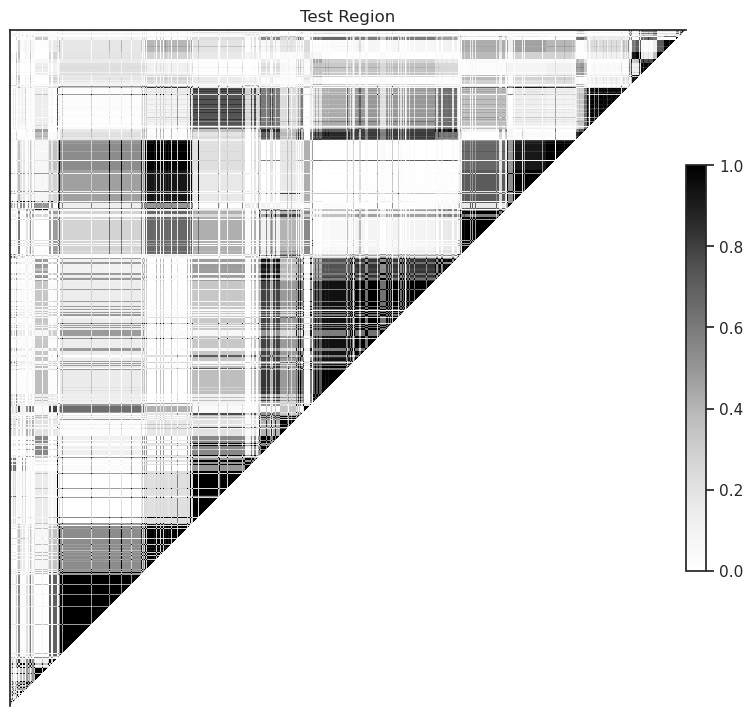

In [11]:
plot_ld(gn[:], 'Test Region')

In [12]:
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region_chr = allel.GenotypeArray(gt_zarr)
gt = gt_region_chr.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
gn
pos_reg = pos.compress(flt, axis=0)

In [13]:
df = ldblock_identification(gn, pos_reg)

0.0
0.19449829165667162
0.2593310555422288
0.32416381942778605
0.38899658331334325
0.5186621110844576
0.6483276388555721
0.8428259305122436
0.9076586943978009
0.972491458283358


In [14]:
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Mikumi, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region_chr = allel.GenotypeArray(gt_zarr)
gt = gt_region_chr.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
gn
pos_reg = pos.compress(flt, axis=0)
df_mik = ldblock_identification(gn, pos_reg)

0.0
0.14558513090529687
0.24264188484216145
0.29117026181059374
0.33969863877902606
0.3882270157474583
0.43675539271589064
0.4852837696843229
0.5338121466527552
0.6308689005896198
0.6793972775580521
0.7279256545264844
0.7764540314949167
0.8735107854317813


In [27]:
genetic_map_path = "../smcpp_pyrho/steps/pyrho/Mikumi/chr20_full_aut.rmap"
genetic_map_20 = pd.read_csv(genetic_map_path, sep="\t", names = ["start", "end", "recomb"])

In [45]:
df_mik

,block_starts,block_ends,interval_variants,average_LD,start_i,end_i
0,241651,242771,8,0.806459,428,436
1,285743,286040,8,0.897368,592,600
2,287055,287785,9,0.828744,615,624
3,301835,303208,8,0.980972,657,665
4,303607,304672,8,0.853725,667,675
...,...,...,...,...,...,...
3848,71836690,71837915,10,1.000000,205688,205698
3849,71838103,71838863,9,1.000000,205699,205708
3850,71839404,71839791,8,1.000000,205710,205718
3851,71839882,71840672,8,0.898276,205719,205727


In [52]:
r_array = np.array(genetic_map_20["recomb"])
(r_array[1:] > 1.4*r_array[:-1]).sum()

3925

In [79]:
hotspot_windows = genetic_map_20.loc[(list((r_array[1:] > 1.4*r_array[:-1]))+[False])]
coldspot_windows = genetic_map_20.loc[list(((r_array[1:] > 1.4*r_array[:-1])) == False)+[True]]

In [80]:
hotspot_windows.recomb.mean(), coldspot_windows.recomb.mean()

(1.7162307630147303e-08, 1.0708731562069968e-08)

In [82]:
hotspot_windows

,start,end,recomb
42,7602,7675,2.425052e-08
45,7829,7956,3.395501e-08
167,16580,16802,1.999555e-08
235,20126,20128,1.520606e-08
249,20899,20919,2.962965e-08
...,...,...,...
879874,72025862,72026966,1.413233e-08
879875,72026966,72026967,2.937652e-08
879979,72035773,72035823,7.119281e-09
879982,72036105,72036387,1.540127e-08


In [92]:
hotspot_intervals = [hotspot_windows.start.values, hotspot_windows.end.values]
ld_intervals = [df_mik.block_starts.values, df_mik.block_ends.values]

In [95]:
df_mik

,block_starts,block_ends,interval_variants,average_LD,start_i,end_i
0,241651,242771,8,0.806459,428,436
1,285743,286040,8,0.897368,592,600
2,287055,287785,9,0.828744,615,624
3,301835,303208,8,0.980972,657,665
4,303607,304672,8,0.853725,667,675
...,...,...,...,...,...,...
3848,71836690,71837915,10,1.000000,205688,205698
3849,71838103,71838863,9,1.000000,205699,205708
3850,71839404,71839791,8,1.000000,205710,205718
3851,71839882,71840672,8,0.898276,205719,205727


In [110]:
c = 0
for e in hotspot_windows.end:
    if len(df_mik.loc[(df_mik.block_starts <= e) & (df_mik.block_ends >= e)]) > 0:
        c += 1

In [111]:
c/len(hotspot_windows)

0.08942675159235669

In [118]:
(hotspot_windows.end-hotspot_windows.start).sum()/hotspot_windows.end.max()

0.004666304345593004

In [114]:
c = 0
for e in df_mik.block_ends:
    if len(hotspot_windows.loc[(hotspot_windows.start <= e) & (hotspot_windows.end >= e)]) > 0:
        c += 1
c/len(df_mik)

0.0057098364910459385

<AxesSubplot:xlabel='interval_variants', ylabel='Count'>

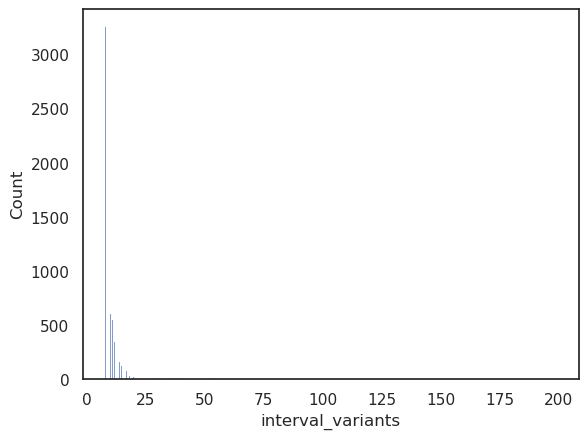

In [119]:
sns.histplot(df.interval_variants)

<AxesSubplot:xlabel='average_LD', ylabel='Count'>

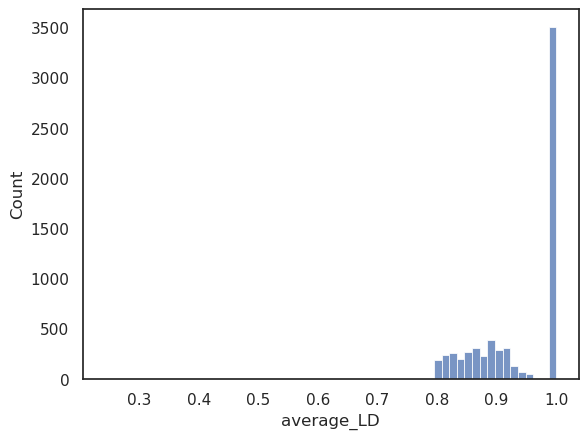

In [120]:
sns.histplot(df.average_LD)

In [121]:
def ldblock_agglomeration(df, gn, pos, min_block=5, extend_rule=0.75):
    i = 0
    j = 0
    start_pos, end_pos, variant_counts, ld_strength, interval_l, interval_l_single = [], [], [], [], [], []
    gn_current = gn[df.start_i[0]: df.end_i[0]]
    interval_l_single = [(df.start_i[0], df.end_i[0])]
    while i < len(df)-1:
        gn_add = gn[df.start_i[i+j+1]: df.end_i[i+j+1]]
        LD_array = allel.rogers_huff_r_between(gn_current, gn_add) ** 2
        med_ld = pd.Series(LD_array.flatten()).median()
        if med_ld < extend_rule or i+j == len(df)-1:
            start_pos.append(df.block_starts[i])
            end_pos.append(df.block_ends[i])
            variant_counts.append(len(gn_current))
            ld_strength.append(pd.Series((allel.rogers_huff_r(gn_current) ** 2)).median())
            interval_l.append(interval_l_single)
            i = i+j+1
            j = 0
            gn_current = gn[df.start_i[i]: df.end_i[i]]
            interval_l_single = [(df.start_i[i], df.end_i[i])]
        else:
            j += 1
            gn_current = np.concatenate((gn_current,gn_add), axis=0)
            interval_l_single.append((df.start_i[i+j], df.end_i[i+j]))
    return pd.DataFrame({"block_starts": start_pos, "block_ends": end_pos,
                         "interval_variants": variant_counts, "average_LD": ld_strength,
                         "intervals": interval_l})

In [128]:
df

,block_starts,block_ends,interval_variants,average_LD,start_i,end_i
0,64785,67406,13,0.708201,88,101
1,120183,124463,11,0.910460,244,255
2,125901,130013,11,0.910460,259,270
3,131150,132468,10,0.910460,272,282
4,133349,134173,8,0.910460,287,295
...,...,...,...,...,...,...
6479,71918027,71919244,10,1.000000,154034,154044
6480,71919277,71921396,9,1.000000,154045,154054
6481,71921511,71922566,8,0.816425,154055,154063
6482,71957662,71960310,8,1.000000,154102,154110


In [122]:
df_agglo = ldblock_agglomeration(df, gn, pos_reg)
df_agglo

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/eriks/min

,block_starts,block_ends,interval_variants,average_LD,intervals
0,64785,67406,13,0.059133,"[(88, 101)]"
1,120183,124463,11,0.067042,"[(244, 255)]"
2,125901,130013,11,0.192654,"[(259, 270)]"
3,131150,132468,10,0.594315,"[(272, 282)]"
4,133349,134173,8,0.546129,"[(287, 295)]"
...,...,...,...,...,...
5723,71828568,71836784,8,0.448857,"[(153880, 153888)]"
5724,71877558,71879270,8,0.339056,"[(153935, 153943)]"
5725,71880482,71881782,8,0.641648,"[(153945, 153953)]"
5726,71885207,71885816,8,0.682237,"[(153979, 153987)]"


<AxesSubplot:xlabel='interval_variants', ylabel='Count'>

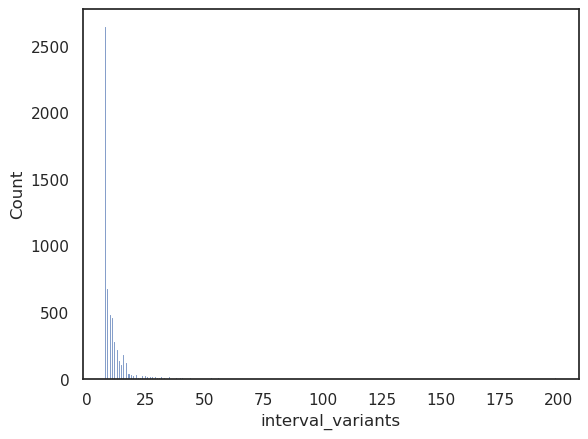

In [123]:
sns.histplot(df_agglo.interval_variants)

In [124]:
df

,block_starts,block_ends,interval_variants,average_LD,start_i,end_i
0,64785,67406,13,0.708201,88,101
1,120183,124463,11,0.910460,244,255
2,125901,130013,11,0.910460,259,270
3,131150,132468,10,0.910460,272,282
4,133349,134173,8,0.910460,287,295
...,...,...,...,...,...,...
6479,71918027,71919244,10,1.000000,154034,154044
6480,71919277,71921396,9,1.000000,154045,154054
6481,71921511,71922566,8,0.816425,154055,154063
6482,71957662,71960310,8,1.000000,154102,154110


In [125]:
df_agglo.interval_variants.sum(), df.interval_variants.sum()

(67961, 67969)

Median LD between blocks.

In [126]:
def ldblock_between_ld(df_agglo, gn, pos, ld_range=15):
    matrix = np.zeros((len(df_agglo), ld_range))
    for i, row in df_agglo.iterrows():
        gn1 = gn[row.intervals[0][0]:row.intervals[0][1]]
        for x in row.intervals[1:]:
            gn_add = gn[x[0]:x[1]]
            gn1 = np.concatenate((gn1,gn_add), axis=0)
        for z in range(1, ld_range+1):
            if i+z == len(df_agglo):
                break
            gn2 = gn[df_agglo.iloc[i+z].intervals[0][0]:df_agglo.iloc[i+z].intervals[0][1]]
            for x in df_agglo.iloc[i+z].intervals[1:]:
                gn_add = gn[x[0]:x[1]]
                gn2 = np.concatenate((gn2,gn_add), axis=0)
            LD_array = allel.rogers_huff_r_between(gn1, gn2) ** 2
            med_ld = pd.Series(LD_array.flatten()).median()
            matrix[i][z-1] = med_ld
    return matrix

In [127]:
ld_matrix = ldblock_between_ld(df_agglo, gn, pos_reg)

In [170]:
ld_matrix

array([[0.04421171, 0.02869254, 0.02176002, ..., 0.03044896, 0.02602521,
        0.03346734],
       [0.05277365, 0.05266712, 0.05690568, ..., 0.02502501, 0.04643551,
        0.03607273],
       [0.3564159 , 0.34188029, 0.00892985, ..., 0.17718419, 0.09925689,
        0.21557198],
       ...,
       [0.30189651, 0.50128931, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58031672, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:ylabel='Count'>

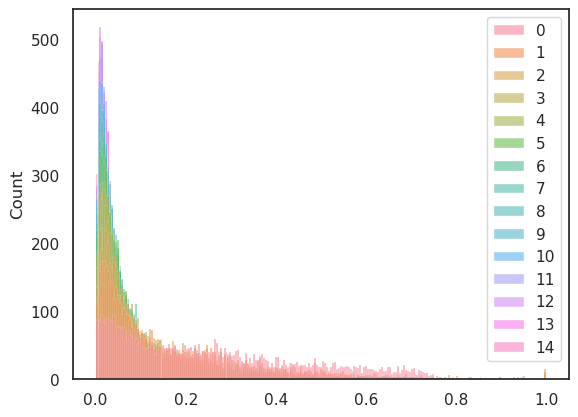

In [129]:
sns.histplot(ld_matrix)

In [79]:
ld_matrix[0]

array([0.23749988, 0.30810791, 0.28963405, 0.03838389, 0.01158535,
       0.04367813, 0.0395833 , 0.01158535, 0.03193279, 0.03999997,
       0.03999997, 0.03193279, 0.03193279, 0.03193279, 0.03334603])

In [148]:
s_array = ld_matrix[0]
s_array[1:] >= s_array[:-1]

array([False, False, False,  True, False,  True,  True,  True, False,
       False, False,  True, False,  True])

In [149]:
s_array

array([0.04421171, 0.02869254, 0.02176002, 0.02052221, 0.02821834,
       0.0169796 , 0.01725761, 0.02496505, 0.03443898, 0.02911875,
       0.02662578, 0.01185465, 0.03044896, 0.02602521, 0.03346734])

In [159]:
(s_array[1:] > s_array[:-1]) & (0.2 > s_array[:3].min()) & (0.3 < s_array[3:].max())

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [180]:
(0.3 > s_array[:3].min())

True

In [183]:
(s_array[1:] > s_array[:-1])

array([False, False, False,  True, False,  True,  True,  True, False,
       False, False,  True, False,  True])

In [174]:
def ld_runs(matrix, df_agglo, pos_reg, min_run=3):
    block_starts = df_agglo.block_starts
    block_ends = df_agglo.block_ends
    run_starts, run_ends, originator, start_i, end_i, orig_i = [], [], [], [], [], []
    for i in range(len(matrix)):
        s_array = matrix[i]
        bool_runs = (s_array[1:] > s_array[:-1]) & (0.2 > s_array[:3].min()) & (0.5 < s_array[3:].max())
        run_size = 0
        for j in range(len(bool_runs)):
            b = bool_runs[j]
            if b == False and run_size < min_run or i+j >= len(matrix):
                run_size = 0
            elif b == True and j+1 != len(bool_runs):
                run_size += 1
            elif run_size > min_run:
                run_starts.append(block_starts[i+j-run_size-1])
                run_ends.append(pos_reg[df_agglo.intervals[i+j-1][-1][1]])
                originator.append(df_agglo.iloc[i].block_starts)
                orig_i.append(i)
                start_i.append(df_agglo.intervals[i+j-run_size-1][0][0])
                end_i.append(df_agglo.intervals[i+j-1][-1][1])
                run_size = 0
    return pd.DataFrame({"run_starts": run_starts, "run_ends": run_ends, "orig_block": orig_i,
                        "originator": originator, "start_i": start_i, "end_i": end_i})

In [176]:
ld_runs(ld_matrix, df_agglo, pos_reg)

,run_starts,run_ends,orig_block,originator,start_i,end_i
0,1221547,1163073,115,1202992,3592,3698
1,3046915,2305960,217,3000345,6705,6768
2,4104763,3345318,303,4121336,8463,8656
3,4332093,3523675,311,4208040,8832,9039
4,4332093,3523675,312,4230086,8832,9039
5,5570187,4879318,428,5534808,11940,12120
6,6861478,6103996,601,6850324,17169,17258
7,8643355,7720415,792,8590614,22650,22756
8,11531492,10011582,1072,11532302,29320,29367
9,11554073,10065002,1072,11532302,29422,29539


In [132]:
pos_reg[31773]

10809607

In [168]:
pos_reg[859:931]

0,1,2,3,4,...,67,68,69,70,71
363755,364587,364970,365273,365316,...,388763,388809,388877,389752,389889


Final plots and checks for the algorithm

In [86]:
s_array = ld_matrix[2116]
s_array[1:] >= s_array[:-1]

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False])

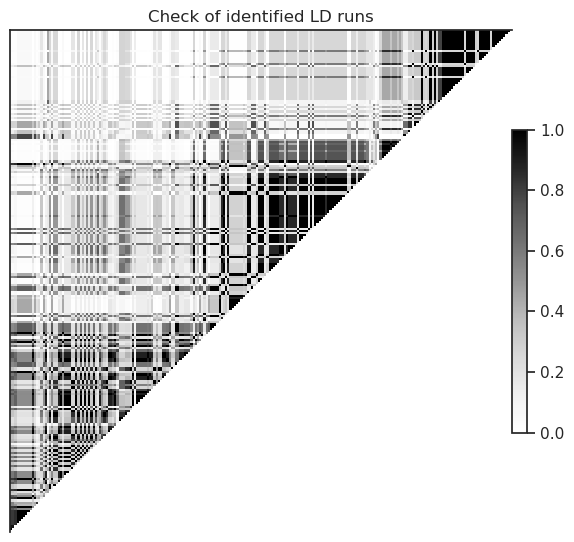

In [177]:
loc_region = pos.locate_range(1163073, 1221547)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn_plot = gf.to_n_alt()
plot_ld(gn_plot[:], 'Check of identified LD runs')

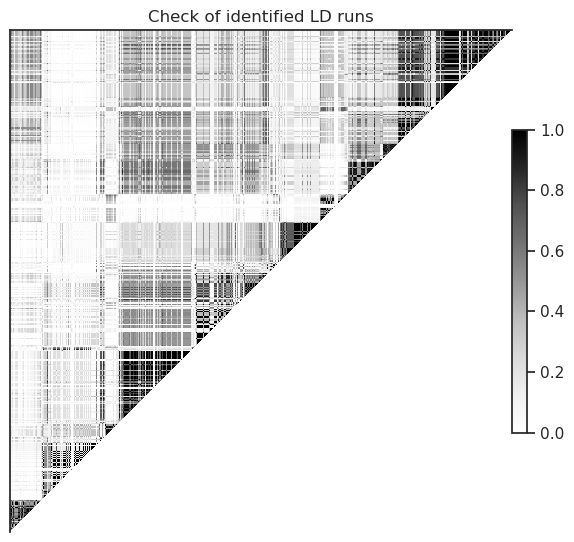

In [119]:
loc_region = pos.locate_range(26801940, 27185678)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn_plot = gf.to_n_alt()
plot_ld(gn_plot[:], 'Check of identified LD runs')

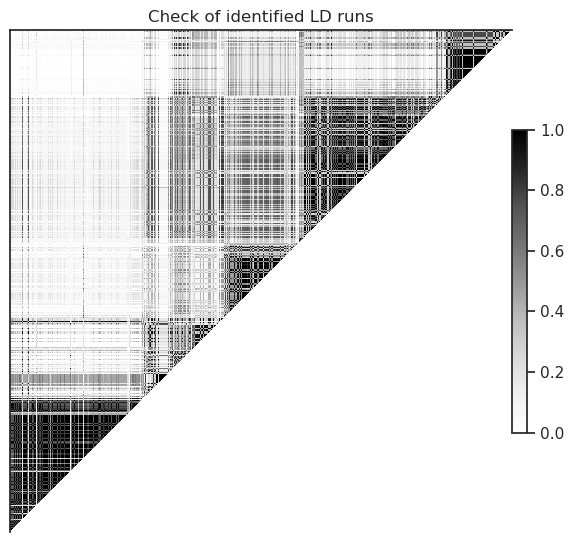

In [122]:
loc_region = pos.locate_range(70509668, 70708024)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn_plot = gf.to_n_alt()
plot_ld(gn_plot[:], 'Check of identified LD runs')

In [ ]:
loc_region = pos.locate_range(37398237, 37610064)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn_plot = gf.to_n_alt()
plot_ld(gn_plot[:], 'Check of identified LD runs')

AFF2 check

In [32]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chrX"
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode="r")
gt_zarr = allel.GenotypeArray(callset["calldata/GT"])
pos = allel.SortedIndex(callset["variants/POS"])

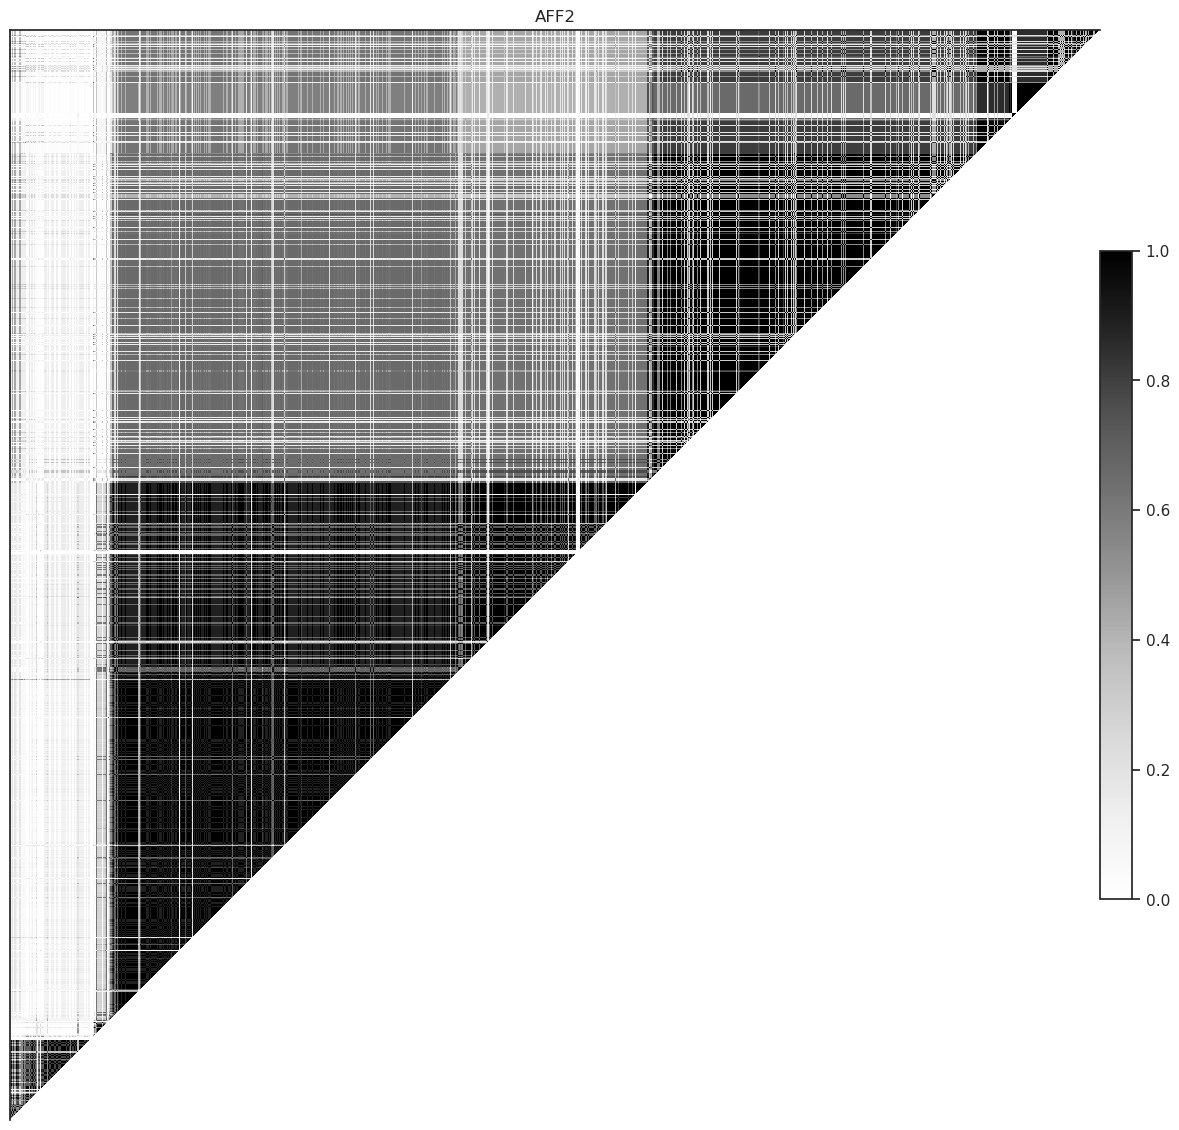

In [33]:
loc_region = pos.locate_range(136000000, 137500000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania") &
                           (meta_data_samples.Sex == "F")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'AFF2')

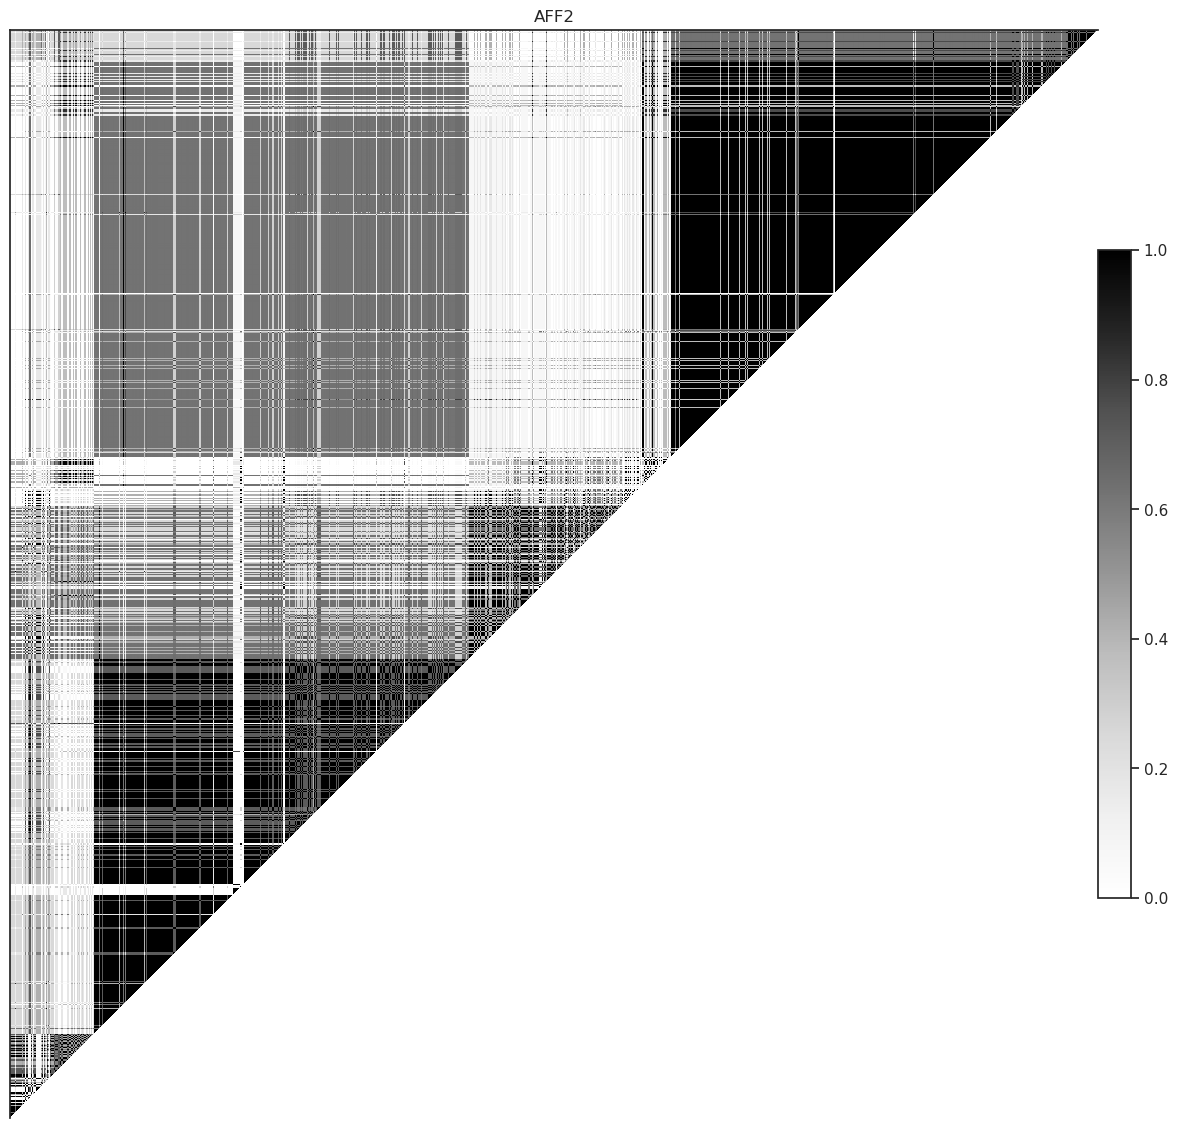

In [34]:
loc_region = pos.locate_range(136000000, 137500000)
IDs = meta_data_samples.loc[(meta_data_samples.Origin == "Filoha, Ethiopia") &
                           (meta_data_samples.Sex == "F")].callset_index.values

pos = allel.SortedIndex(callset["variants/POS"])
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > (len(IDs)*2)//4)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
plot_ld(gn[:], 'AFF2')